In [1]:
#linear regression by making own function
#step-1 importing imp libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
#making model
class linear_regression():  #defines a new class named linear_regression
  def __init__(self):   #__init__ is the constructor method called when we create an object of the class.
      self.bias=None  # to store the intercept of the regression line (b in formula).
      self.weight=None  # to store the slope of the regression line (m in formula).

  def fit(self,x,y):  #fit method calculates the optimal slope (weight) and intercept (bias) to fit a linear relationship
    x_mean=x.mean()  #Mean of all x-values.
    y_mean=y.mean()


    #initializing the value of numerator and denominator for the calculation of weight
    num=0  #will accumulate the covariance between x and y.
    den=0  #will accumulate the variance of x.

    # calculating the cross deviation and deviation about x(Computing Covariance and Variance)

    for i in range(len(x)):
      num+=(x[i]-x_mean)*(y[i]-y_mean)  #
      den+=(x[i]-x_mean)**2

    #calculating the weight(slope) and bias(intercept)
    self.weight=num/den
    self.bias=y_mean-self.weight*x_mean

  def predict(self,x):  #For any given input x, the model predicts y using the linear equation:
    return self.weight*x +self.bias



In [3]:
df=pd.read_csv('salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
 x=df['YearsExperience']
 y=df['Salary']
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
 model=linear_regression()
 model.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
 y_pred=model.predict(x_test)

In [10]:
print(f'weight:{model.weight}')
print(f'bias:{model.bias}')

weight:[9727.49188506]
bias:[24107.36559702]


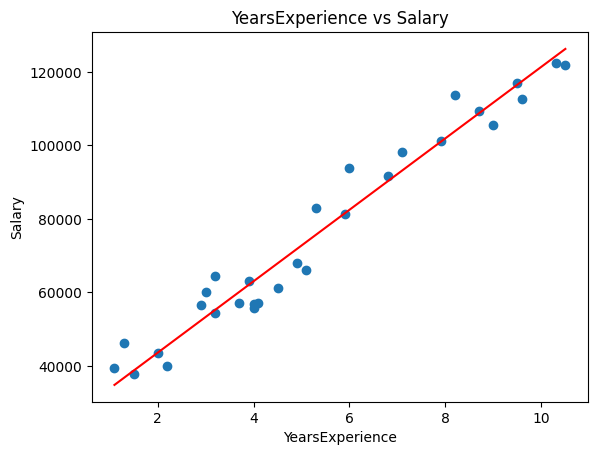

In [13]:
plt.title('YearsExperience vs Salary')  #s sets the title of the plot to "YearsExperience vs Salary".
plt.scatter(x,y)  #This plots the scatter points of the actual data Each point corresponds to the real data (YearsExperience, Salary).
plt.plot(x,model.bias+model.weight*x, 'r-')  #model.bias + model.weight * x: This is the predicted salary for each value of x.
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()